Спуск -3.894039 1.192859


<IPython.core.display.Javascript object>


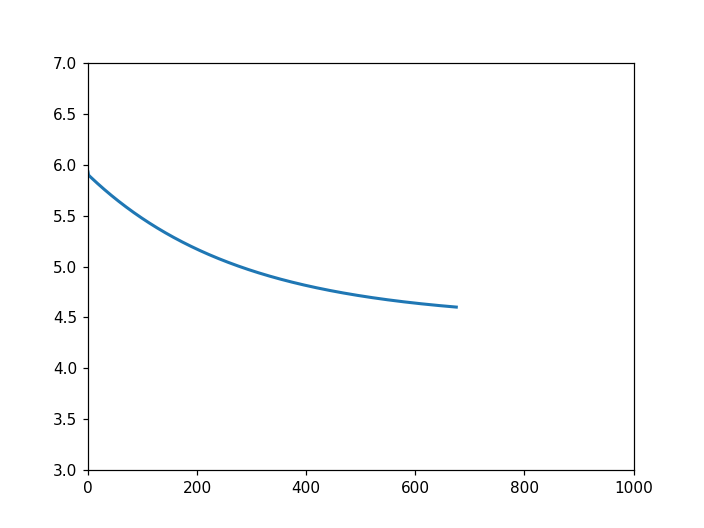

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from functools import reduce
import matplotlib.animation as animation

def read_data():
    dataset = []
    with open("data1.txt","r") as f:
        for line in f.readlines():
            dataset.append(list(map(lambda x : float(x) ,line.split(" "))))
    return dataset


dataset=read_data()
c1=0
c0=0
e=10**-9
a=0.01
m = len(dataset)       
def calc_J(c0,c1):
    summ = 0.0
    for i in range(len(dataset)):
        summ+= (c0+c1*dataset[i][0] - dataset[i][1])**2
    J = (1/(2*m)) * summ
    return J
    
def calc_C(c0,c1):
    summ1 =0.0
    for i in range(len(dataset)):
        summ1+=c0+c1*dataset[i][0] - dataset[i][1]
        
    summ2 =0.0
    for i in range(len(dataset)):
        summ2+=(c0+c1*dataset[i][0] - dataset[i][1])*dataset[i][0]
    c0 = c0 - (1/m)*summ1*a
    c1 = c1 - (1/m)*summ2*a
    return (c1,c0)
def solve(c1,c0):
    J0 = calc_J(c0,c1)
    c1,c0 = calc_C(c0,c1)
    J1 = calc_J(c0,c1)
    rem_j=[]
    while J0-J1>e:
        J0 = J1
        c1,c0 = calc_C(c0,c1)
        J1 = calc_J(c0,c1)
        rem_j.append([J1])
    print("Спуск %f %f"% (c0,c1))
    return [(c0,c1),rem_j]
    
    
       

result,rem_j = solve(c1,c0)
def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data([i for i in range(i)],[rem_j[i] for i in range(i)])
    return line,
fig = plt.figure()
ax = plt.axes(xlim = (0, 1000), ylim = (3,7))
line, = ax.plot([], [], lw = 2)
plt.show()
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=10, blit=True)